In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost.callback import EarlyStopping

In [155]:
df =pd.read_csv('./train.csv')
test_df=pd.read_csv('./test.csv')

In [156]:
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [157]:
df["study_band"] = pd.cut(
    df["study_hours"],
    bins=[0, 2, 4, 6, 8],
    labels=[0, 1, 2, 3]
)

test_df["study_band"] = pd.cut(
    test_df["study_hours"],
    bins=[0, 2, 4, 6, 8],
    labels=[0, 1, 2, 3]
)

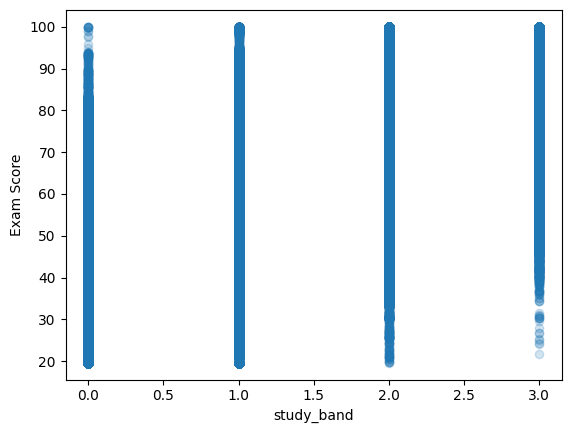

In [158]:
plt.scatter(df["study_band"], df["exam_score"], alpha=0.2)
plt.xlabel("study_band")
plt.ylabel("Exam Score")
plt.show()

In [134]:
df.groupby("study_band")["exam_score"].median()

C:\Users\rajes\AppData\Local\Temp\ipykernel_11764\1818735642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("study_band")["exam_score"].median()


study_band
0    43.8
1    56.3
2    68.9
3    81.3
Name: exam_score, dtype: float64

In [160]:
# # df.head()
# df["study_band"] = df["study_band"].astype(int)
# test_df["study_band"] = test_df["study_band"].astype(int)
df["band_x_hours"] = df["study_band"] * df["study_hours"]

test_df["band_x_hours"] = test_df["study_band"] * test_df["study_hours"]

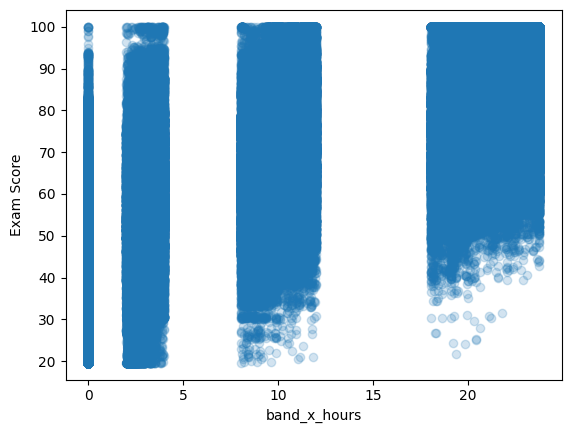

In [161]:
plt.scatter(df["band_x_hours"], df["exam_score"], alpha=0.2)
plt.xlabel("band_x_hours")
plt.ylabel("Exam Score")
plt.show()

In [162]:
df["coaching_x_band_hours"] = (
    (df["study_method"] == "coaching").astype(int)
    * df["band_x_hours"]
)

test_df["coaching_x_band_hours"] = (
    (test_df["study_method"] == "coaching").astype(int)
    * test_df["band_x_hours"]
)

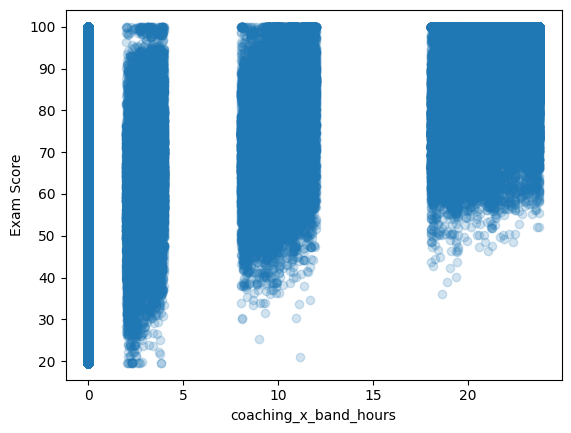

In [140]:
plt.scatter(df["coaching_x_band_hours"], df["exam_score"], alpha=0.2)
plt.xlabel("coaching_x_band_hours")
plt.ylabel("Exam Score")
plt.show()

In [163]:
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,study_band,band_x_hours,coaching_x_band_hours
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3,3,23.73,0.00
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7,2,9.90,0.00
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0,2,9.36,9.36
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9,0,0.00,0.00
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0,3,22.95,0.00


In [142]:
df.groupby("sleep_quality")["exam_score"].median()

sleep_quality
average    62.6
good       68.2
poor       57.2
Name: exam_score, dtype: float64

In [164]:
sleep_map = {'average':0, 'poor':1, 'good':2}
df['sleep_quality'] = df['sleep_quality'].map(sleep_map)
#Test Data
test_df['sleep_quality'] = test_df['sleep_quality'].map(sleep_map)

In [165]:
df["sleep_effectiveness"] = df["sleep_hours"] * df["sleep_quality"]
test_df["sleep_effectiveness"] = test_df["sleep_hours"] * test_df["sleep_quality"]

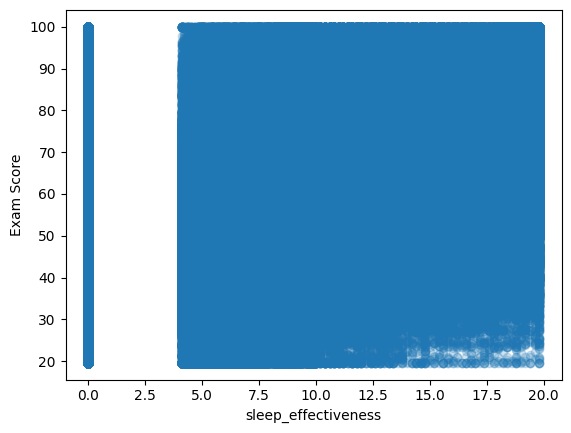

In [145]:
plt.scatter(df["sleep_effectiveness"], df["exam_score"], alpha=0.2)
plt.xlabel("sleep_effectiveness")
plt.ylabel("Exam Score")
plt.show()

In [146]:
df.groupby("facility_rating")["exam_score"].median()

facility_rating
high      67.3
low       58.3
medium    63.1
Name: exam_score, dtype: float64

In [167]:
facility_map = {'low':-5, 'medium':0, 'high':4.2}
df['facility_rating'] = df['facility_rating'].map(facility_map)
#Test Data
test_df['facility_rating'] = test_df['facility_rating'].map(facility_map)

In [169]:
df["class_attendance_band"] = pd.cut(
    df["class_attendance"],
    bins=[40, 60, 80, 100],
    labels=[0, 1, 2]
)
test_df["class_attendance_band"] = pd.cut(
    test_df["class_attendance"],
    bins=[40, 60, 80, 100],
    labels=[0, 1, 2]
)

In [150]:
df.groupby("class_attendance_band")["exam_score"].median()

C:\Users\rajes\AppData\Local\Temp\ipykernel_11764\2548986831.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("class_attendance_band")["exam_score"].median()


class_attendance_band
0    53.6
1    62.0
2    70.0
Name: exam_score, dtype: float64

In [170]:
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,study_band,band_x_hours,coaching_x_band_hours,sleep_effectiveness,class_attendance_band
0,0,21,female,b.sc,7.91,98.8,no,4.9,0,online videos,-5.0,easy,78.3,3,23.73,0.00,0.0,2
1,1,18,other,diploma,4.95,94.8,yes,4.7,1,self-study,0.0,moderate,46.7,2,9.90,0.00,4.7,2
2,2,20,female,b.sc,4.68,92.6,yes,5.8,1,coaching,4.2,moderate,99.0,2,9.36,9.36,5.8,2
3,3,19,male,b.sc,2.00,49.5,yes,8.3,0,group study,4.2,moderate,63.9,0,0.00,0.00,0.0,0
4,4,23,male,bca,7.65,86.9,yes,9.6,2,self-study,4.2,easy,100.0,3,22.95,0.00,19.2,2


In [66]:
df.groupby("study_method")["exam_score"].median()


study_method
coaching         69.3
group study      60.8
mixed            65.7
online videos    59.6
self-study       57.3
Name: exam_score, dtype: float64

In [67]:
df.groupby(["study_band", "study_method"])["exam_score"].median()


C:\Users\rajes\AppData\Local\Temp\ipykernel_11764\2476952877.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["study_band", "study_method"])["exam_score"].median()


study_band  study_method 
0           coaching         49.7
            group study      42.8
            mixed            45.2
            online videos    41.1
            self-study       40.1
1           coaching         61.2
            group study      55.2
            mixed            58.9
            online videos    54.1
            self-study       52.2
2           coaching         74.3
            group study      67.1
            mixed            70.7
            online videos    66.7
            self-study       65.4
3           coaching         88.4
            group study      79.2
            mixed            82.0
            online videos    78.3
            self-study       77.1
Name: exam_score, dtype: float64

In [171]:
income_map = {'easy':-5, 'moderate':0, 'hard':5}
df['exam_difficulty'] = df['exam_difficulty'].map(income_map)
#Test Data
test_df['exam_difficulty'] = test_df['exam_difficulty'].map(income_map)

In [172]:
income_map = {'no':0, 'yes':5}
df['internet_access'] = df['internet_access'].map(income_map)
#Test Data
test_df['internet_access'] = test_df['internet_access'].map(income_map)

In [184]:
df.head()
# test_df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,study_band,band_x_hours,coaching_x_band_hours,sleep_effectiveness,class_attendance_band
0,0,21,female,b.sc,7.91,98.8,0,4.9,0,online videos,-5.0,-5,78.3,3,23.73,0.00,0.0,2
1,1,18,other,diploma,4.95,94.8,5,4.7,1,self-study,0.0,0,46.7,2,9.90,0.00,4.7,2
2,2,20,female,b.sc,4.68,92.6,5,5.8,1,coaching,4.2,0,99.0,2,9.36,9.36,5.8,2
3,3,19,male,b.sc,2.00,49.5,5,8.3,0,group study,4.2,0,63.9,0,0.00,0.00,0.0,0
4,4,23,male,bca,7.65,86.9,5,9.6,2,self-study,4.2,-5,100.0,3,22.95,0.00,19.2,2


In [174]:
df1 = pd.get_dummies(df, columns=['gender'])
df2 = pd.get_dummies(df1, columns=['study_method'])
df3 = pd.get_dummies(df2, columns=['course'])
df3.head()
test_df1 = pd.get_dummies(test_df, columns=['gender'])
test_df2 = pd.get_dummies(test_df1, columns=['study_method'])
test_df3 = pd.get_dummies(test_df2, columns=['course'])
test_df3.head()

,id,age,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,study_band,...,study_method_mixed,study_method_online videos,study_method_self-study,course_b.com,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma
0,630000,24,6.85,65.2,5,5.2,1,4.2,-5,3,...,False,False,False,False,False,False,True,False,False,False
1,630001,18,6.61,45.0,0,9.3,1,-5.0,-5,3,...,False,False,False,False,False,False,False,False,False,True
2,630002,24,6.60,98.5,5,6.2,2,0.0,0,3,...,False,False,False,False,False,True,False,False,False,False
3,630003,24,3.03,66.3,5,5.7,0,0.0,0,1,...,True,False,False,False,False,False,False,False,False,True
4,630004,20,2.03,42.4,5,9.2,0,-5.0,0,1,...,False,False,False,False,False,True,False,False,False,False


In [186]:

# X = df3.drop(['exam_score','id'], axis=1)
X = df3[['study_hours','band_x_hours','class_attendance','facility_rating','sleep_effectiveness','sleep_quality','coaching_x_band_hours','sleep_hours','study_method_coaching','study_method_mixed','study_method_self-study','study_method_online videos','study_method_group study']]
y = df3['exam_score']
#Test Data
# test_y = test_df3.drop(['id'], axis=1)
test_y= test_df3[['study_hours','band_x_hours','class_attendance','facility_rating','sleep_effectiveness','sleep_quality','coaching_x_band_hours','sleep_hours','study_method_coaching','study_method_mixed','study_method_self-study','study_method_online videos','study_method_group study']]

In [44]:
df3.describe()

,id,age,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,4.598595,7.072758,-0.004651,-0.070143,-0.611603,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.358639,1.744811,4.115226,4.061993,3.252546,18.916884
min,0.000000,17.000000,0.080000,40.600000,0.000000,4.100000,-5.000000,-5.000000,-5.000000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.000000,5.600000,-5.000000,-5.000000,-5.000000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,5.000000,7.100000,0.000000,0.000000,0.000000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,5.000000,8.600000,5.000000,5.000000,0.000000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,5.000000,9.900000,5.000000,5.000000,5.000000,100.000000


In [64]:
df.groupby("study_band")["exam_score"].median()


C:\Users\rajes\AppData\Local\Temp\ipykernel_11764\1175416081.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("study_band")["exam_score"].median()


study_band
0    43.8
1    56.3
2    68.9
3    81.3
Name: exam_score, dtype: float64

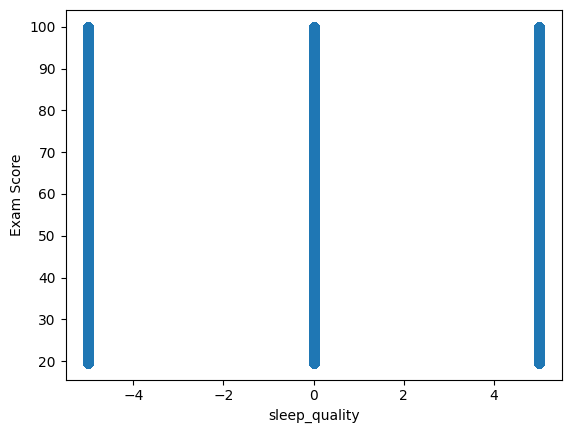

In [61]:
plt.scatter(df["sleep_quality"], df["exam_score"], alpha=0.2)
plt.xlabel("sleep_quality")
plt.ylabel("Exam Score")
plt.show()

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# X_train = X
# y_train = y
# X_test = X
# y_test = y

In [206]:
# model = LinearRegression()
# model = GradientBoostingRegressor(
#     n_estimators=300,
#     learning_rate=0.05,
#     max_depth=3,
#     random_state=42
# )
# model.fit(X_train,y_train)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test, label=y_test)
dtest_test  = xgb.DMatrix(test_y)

In [201]:
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "max_depth": 6,
    "eta": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}

In [202]:
booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=300,
    evals=[(dtest, "test")],
    verbose_eval=50
)

[0]	test-rmse:18.20816
[50]	test-rmse:9.21890
[100]	test-rmse:8.83473
[150]	test-rmse:8.79917
[200]	test-rmse:8.78577
[250]	test-rmse:8.77464
[299]	test-rmse:8.76596


In [178]:
importances = model.feature_importances_

feature_importance = pd.Series(
    importances, 
    index=X_train.columns
).sort_values(ascending=False)

print(feature_importance)

study_hours                   4.375261e-01
band_x_hours                  2.993089e-01
class_attendance              1.147795e-01
facility_rating               3.283503e-02
sleep_effectiveness           3.270724e-02
sleep_quality                 2.288955e-02
coaching_x_band_hours         1.858001e-02
sleep_hours                   1.562174e-02
study_method_coaching         1.437939e-02
study_method_mixed            4.843585e-03
study_method_self-study       3.551818e-03
study_method_online videos    2.031399e-03
study_method_group study      7.941247e-04
age                           4.827112e-05
gender_other                  4.243429e-05
course_b.sc                   3.349968e-05
gender_male                   1.240639e-05
course_bba                    1.173395e-05
course_diploma                3.072317e-06
course_b.tech                 2.027522e-07
study_band                    0.000000e+00
exam_difficulty               0.000000e+00
internet_access               0.000000e+00
class_atten

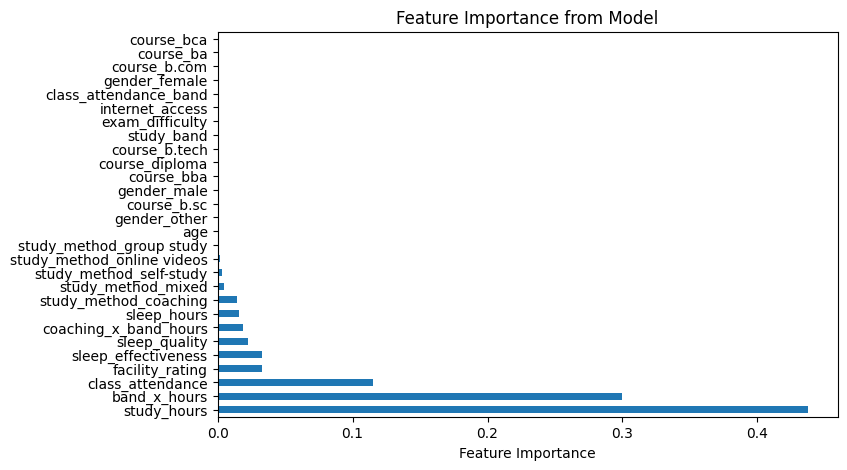

In [183]:
feature_importance.plot(kind='barh', figsize=(8,5))
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Model")
plt.show()

In [208]:
y_pred = booster.predict(dtest)
test_predictions = booster.predict(dtest_test)
print(test_predictions)

[71.73062  70.31726  87.680435 ... 92.02599  54.900646 68.609085]


In [209]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.7839375555923466
MAE: 6.9889472158169825


In [210]:
submission = pd.DataFrame({
    "id": test_df["id"],
    "exam_score": test_predictions
})

In [211]:
submission.to_csv("submission.csv", index=False)

In [62]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(model.__class__.__name__)
    print("R2 Score :", r2)
    print("MAE      :", mae)
    print("RMSE     :", rmse)
    print("-" * 30)

    return y_pred


In [96]:
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.01),
    DecisionTreeRegressor(max_depth=5),
    RandomForestRegressor(n_estimators=100),
    GradientBoostingRegressor()
]

for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)

ValueError: could not convert string to float: 'yes'